In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colors = {"DCT": "#800515",
               "IC/DCT": "#bd5713",
               "Endothelium": "#63ad2d", 
               "PC": "#a4b507",
               "Immune": "black",
               "Podo": "#6e640e", 
               "Fibro": "#1c768a",
               "VSMC/Mes": "#3e9c72",
               "PT": "#448efc",
               "PT?": "#51657a", 
               "iPT": "#6f37b3",
               "PEC": "#ff0011",
               "TAL": "#b44dbf",
               "Injured TAL": "#e3126d",
         }

In [3]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/7_13_23_slide0_annotated.h5ad")

In [4]:
adata.obs["sample"].value_counts()

sample
HK3039    283641
HK2844    274960
Name: count, dtype: int64

In [5]:
adata.obs["cellType_CosMx_1"].value_counts()

cellType_CosMx_1
PT             167722
TAL             75458
Fibro           70389
Endothelium     52335
Immune          40993
PC              37993
IC/DCT          25426
Injured TAL     24028
DCT             22763
iPT             18183
Podo             8920
VSMC/Mes         8636
PEC              5755
Name: count, dtype: int64

  0%|          | 0/1000 [00:00<?, ?/s]

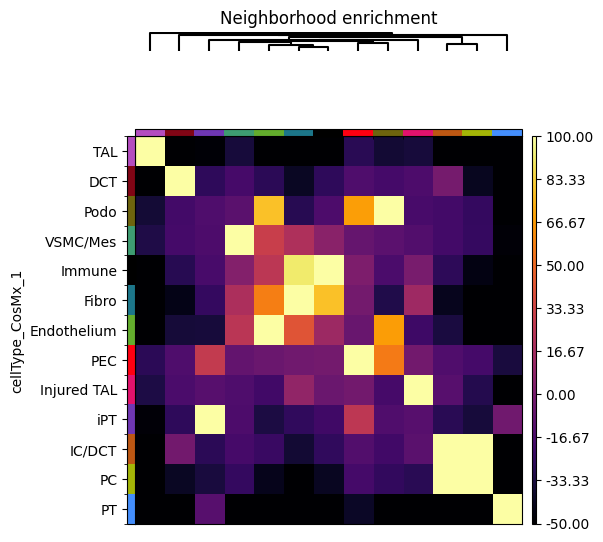

In [6]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=1,
    coord_type="generic",
    key_added = "1_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "1_nn")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    method="average",
    cmap="inferno",
    connectivity_key = "1_nn",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)



  0%|          | 0/1000 [00:00<?, ?/s]

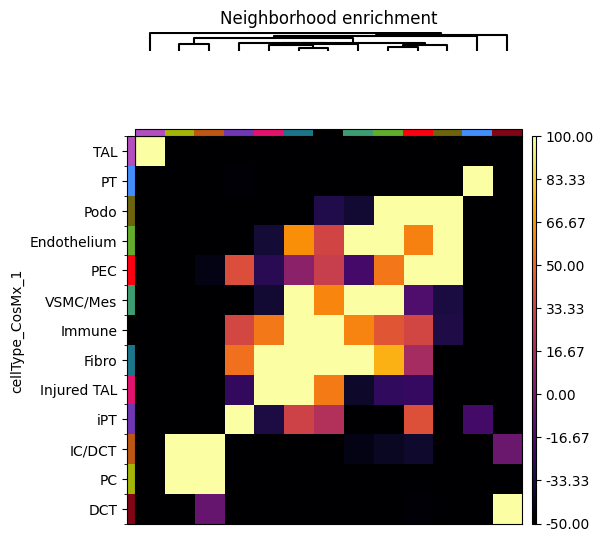

In [7]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=20,
    coord_type="generic",
    key_added = "20_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "20_nn")
sq.pl.nhood_enrichment(
    adata,
    connectivity_key = "20_nn",
    cluster_key="cellType_CosMx_1",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)


  0%|          | 0/1000 [00:00<?, ?/s]

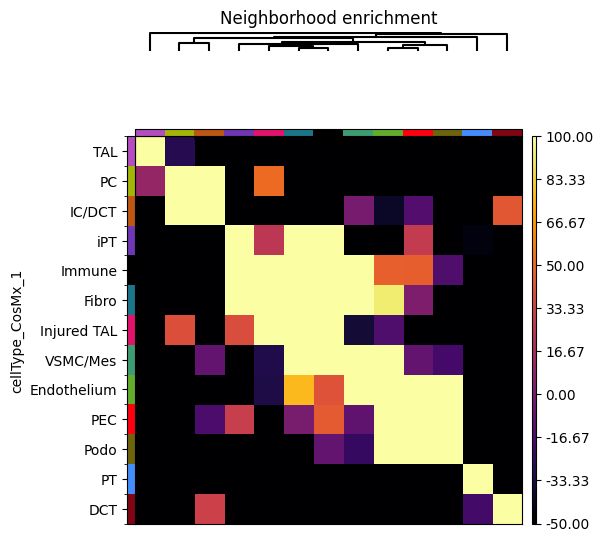

In [8]:
sq.gr.spatial_neighbors(
    adata,
    n_neighs=100,
    coord_type="generic",
    key_added = "100_nn"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "100_nn")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    connectivity_key = "100_nn",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)

  0%|          | 0/1000 [00:00<?, ?/s]

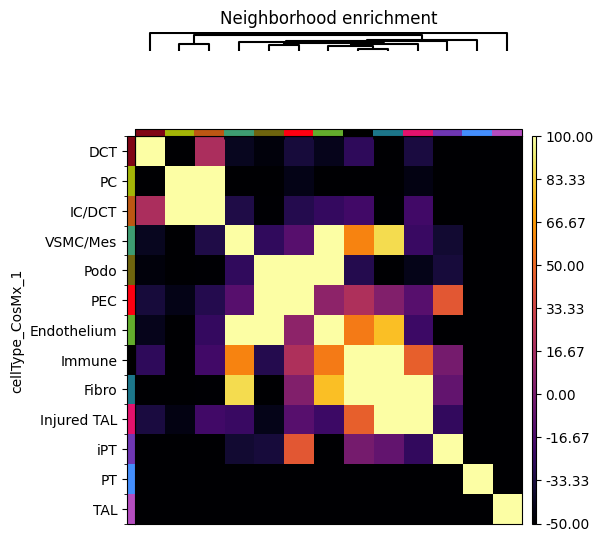

In [9]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.02,
    coord_type="generic",
    key_added = "20_micron"
)

sq.gr.nhood_enrichment(adata, cluster_key="cellType_CosMx_1", connectivity_key = "20_micron")
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cellType_CosMx_1",
    connectivity_key = "20_micron",
    method="average",
    cmap="inferno",
    vmin=-50,
    vmax=100,
    figsize=(5, 5),
)

In [10]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.02,
    coord_type="generic",
)

# 20 micron neighborhood

(array([3.1150e+03, 1.2091e+04, 2.8474e+04, 4.5960e+04, 5.8063e+04,
        6.2791e+04, 6.1784e+04, 5.7964e+04, 5.2403e+04, 4.5572e+04,
        3.7688e+04, 2.9723e+04, 2.2083e+04, 1.5453e+04, 1.0401e+04,
        6.2800e+03, 3.7700e+03, 2.2890e+03, 1.2490e+03, 6.9200e+02,
        3.5800e+02, 1.9600e+02, 8.6000e+01, 5.8000e+01, 2.2000e+01,
        1.0000e+01, 1.1000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

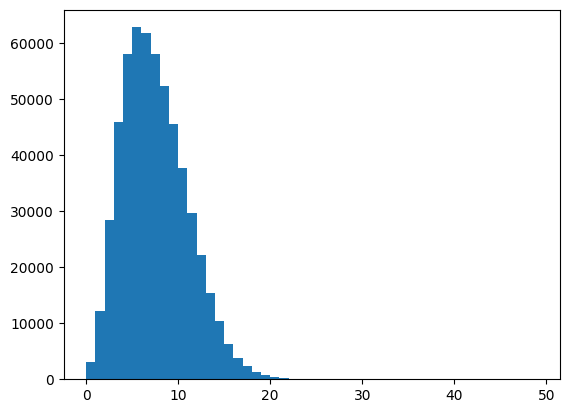

In [11]:
neighbor_check = []
for i in range(adata.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors
plt.hist(neighbor_check, bins = np.arange(0, 50, 1))

In [12]:
immuneCells = (np.where(adata.obs['cellType_CosMx_1']=="Fibro")[0])
neighbors_immune = np.where(adata.obsp["spatial_connectivities"][:, immuneCells].sum(axis=1) > 0)[0]
adata.obs["immune_neighbors"] = 0

for i in neighbors_immune:
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


/tmp/ipykernel_204972/2354960472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


(array([3.20868e+05, 1.10408e+05, 5.49840e+04, 3.03890e+04, 1.80060e+04,
        1.05040e+04, 6.21900e+03, 3.55700e+03, 1.94000e+03, 9.36000e+02,
        4.81000e+02, 2.07000e+02, 6.60000e+01, 2.80000e+01, 7.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 19 artists>)

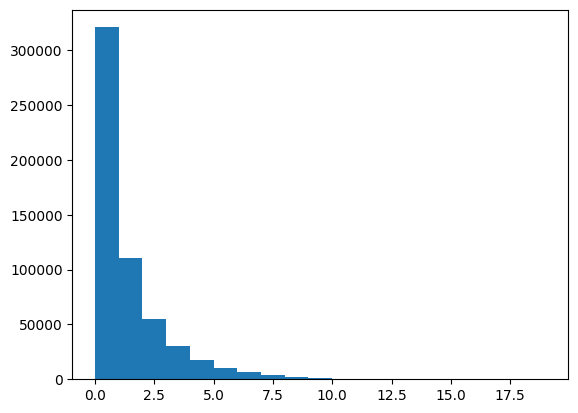

In [13]:
plt.hist(adata.obs["immune_neighbors"], bins = np.arange(0, 20, 1))

/tmp/ipykernel_204972/215710432.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_PT.obs["ImmuneNeighbor"] = (adata_PT.obs["immune_neighbors"] > 0).astype('str')


ImmuneNeighbor
False    125112
True      42610
Name: count, dtype: int64


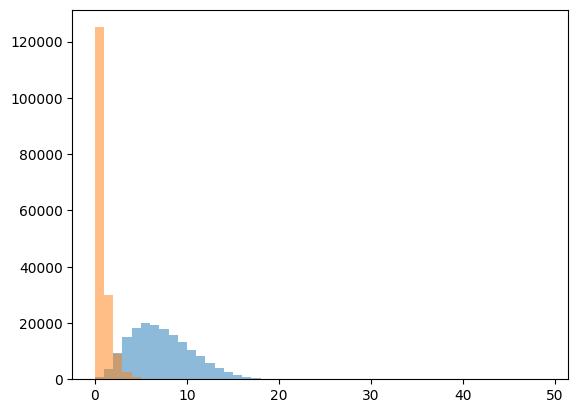

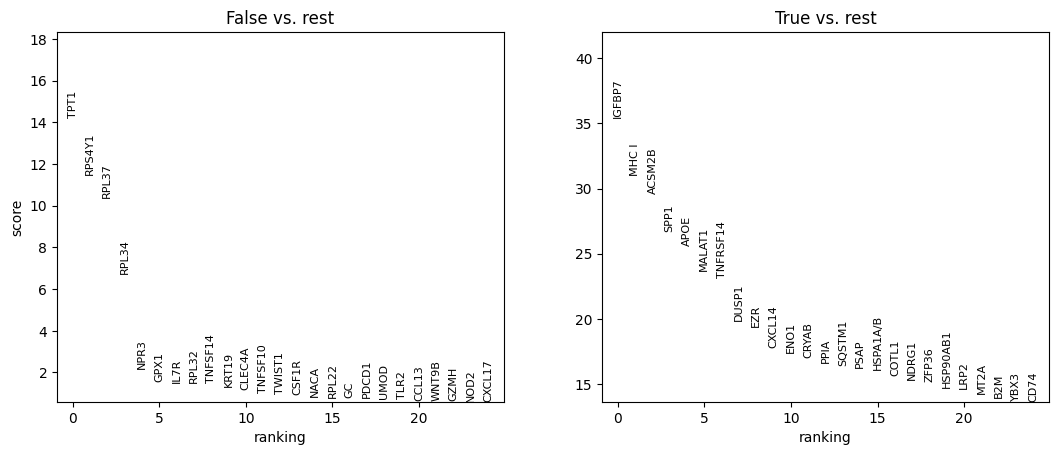

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


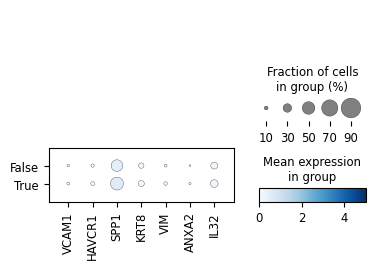

In [14]:
### For Fibro neighbors

adata_PT = adata[adata.obs['cellType_CosMx_1'].isin(["PT"])]

neighbor_check = []
for i in range(adata_PT.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors for PT cells
plt.hist(neighbor_check, bins = np.arange(0, 50, 1), alpha = 0.5)

plt.hist(adata_PT.obs["immune_neighbors"], bins = np.arange(0, 20, 1), alpha = 0.5)

adata_PT.obs["ImmuneNeighbor"] = (adata_PT.obs["immune_neighbors"] > 0).astype('str')

print(adata_PT.obs["ImmuneNeighbor"].value_counts())

adata_PT.X = adata_PT.layers["counts"]
sc.pp.log1p(adata_PT)
sc.tl.rank_genes_groups(adata_PT, groupby='ImmuneNeighbor', method='wilcoxon', pts = True)
sc.pl.rank_genes_groups(adata_PT, n_genes=25, sharey=False)


df = sc.get.rank_genes_groups_df(adata_PT, group="True")
df.to_csv('/home/levinsj/Fetal_dir/DEG/CosMx_PT_fibroNeighbor.csv')

df = sc.get.rank_genes_groups_df(adata_PT, group="False")
df.to_csv('/home/levinsj/Fetal_dir/DEG/CosMx_PT_NofibroNeighbor.csv')

markers = ["VCAM1", "HAVCR1", "SPP1", "KRT8", "VIM", "ANXA2", "IL32"]
sc.pl.dotplot(adata_PT, markers, groupby='ImmuneNeighbor', cmap='Blues', log = False, vmin = 0, vmax = 5, dot_max = 0.9)

/tmp/ipykernel_204972/865211699.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_PT.obs["ImmuneNeighbor"] = (adata_PT.obs["immune_neighbors"] > 0).astype('str')


ImmuneNeighbor
False    10030
True      8153
Name: count, dtype: int64


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


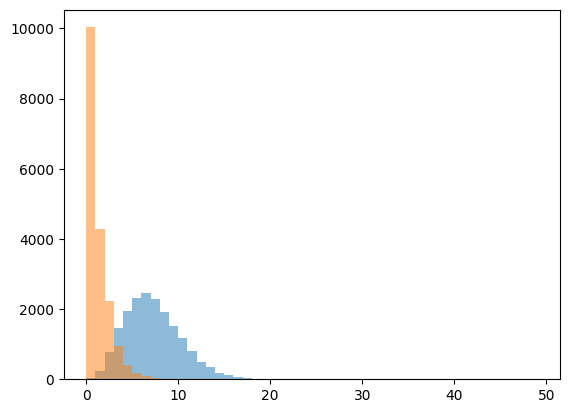

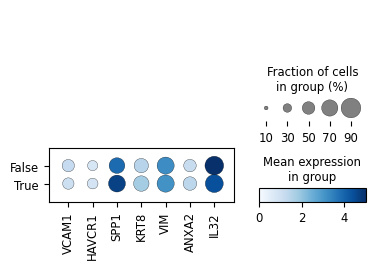

In [15]:
adata_PT = adata[adata.obs['cellType_CosMx_1'].isin(["iPT"])]

neighbor_check = []
for i in range(adata_PT.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors for PT cells
plt.hist(neighbor_check, bins = np.arange(0, 50, 1), alpha = 0.5)

plt.hist(adata_PT.obs["immune_neighbors"], bins = np.arange(0, 20, 1), alpha = 0.5)

adata_PT.obs["ImmuneNeighbor"] = (adata_PT.obs["immune_neighbors"] > 0).astype('str')

print(adata_PT.obs["ImmuneNeighbor"].value_counts())

markers = ["VCAM1", "HAVCR1", "SPP1", "KRT8", "VIM", "ANXA2", "IL32"]
sc.pl.dotplot(adata_PT, markers, groupby='ImmuneNeighbor', cmap='Blues', log = False, vmin = 0, vmax = 5, dot_max = 0.9)

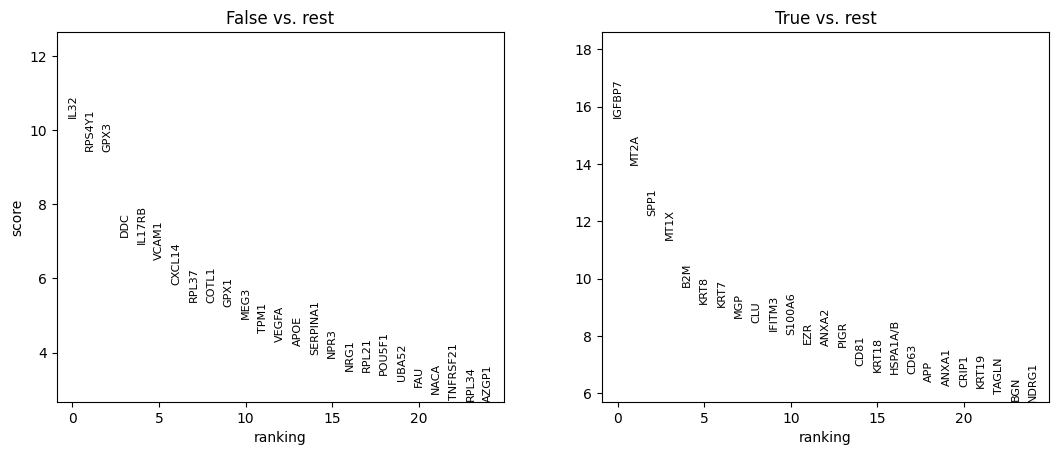

In [16]:
adata_PT.X = adata_PT.layers["counts"]
sc.pp.log1p(adata_PT)
sc.tl.rank_genes_groups(adata_PT, groupby='ImmuneNeighbor', method='wilcoxon', pts = True)
sc.pl.rank_genes_groups(adata_PT, n_genes=25, sharey=False)

df = sc.get.rank_genes_groups_df(adata_PT, group="True")
df.to_csv('/home/levinsj/Fetal_dir/DEG/CosMx_iPT_fibroNeighbor.csv')

df = sc.get.rank_genes_groups_df(adata_PT, group="False")
df.to_csv('/home/levinsj/Fetal_dir/DEG/CosMx_iPT_NofibroNeighbor.csv')
